In [3]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import warnings as w
import gc

w.filterwarnings(action='ignore')
plt.style.use('ggplot')
pd.set_option('display.max_column',None)

In [4]:
customers = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/customers.csv',
                        low_memory=True,
                        usecols={'customer_id':str,
                        'FN':np.uint8,
                        'Active':np.uint8,
                        'club_member_status':str,
                        'fashion_news_frequency':str,
                        'age':np.uint8,
                        'postal_code':str,
                    })
article = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/articles.csv',
                     low_memory=True,
                      usecols={'article_id':np.uint8,
                      'product_code':np.uint8,
                      'product_type_no':np.uint8,
                      'graphical_appearance_no':np.uint8,
                      'colour_group_code':np.uint8,
                      'perceived_colour_value_id':np.uint8,
                      'perceived_colour_master_id':np.uint8,
                      'department_no':np.uint8,
                      'index_code':np.uint8,
                      'index_group_no':np.uint8,
                      'section_no':np.uint8,
                      'garment_group_no':np.uint8
                         })
# transaction file is too big so 10000000 data
transaction = pd.read_csv('../input/h-and-m-personalized-fashion-recommendations/transactions_train.csv',
                         low_memory=True,
                          usecols={
                          't_dat':str,
                          'customer_id':str,
                          'article_id':np.uint8,
                          'price':np.float16,
                          'sales_channel_id':np.uint8
                         },nrows=15000000)
print('Customer:',customers.shape)
print('article:',article.shape)
print('transaction',transaction.shape)
gc.collect()

Customer: (1371980, 7)
article: (105542, 12)
transaction (15000000, 5)


23

## Feature explain
 * Customers(User Field)
     1. customer_id : personal id
     2. FN : Fashion News?
     3. Active : ?
     4. club_member_status : iterally
     5. fashion_news_frequency: iterally
     6. age 
     7. post_code : store adress id? customer bought in postal_code

In [5]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [7]:
customers.isna().sum()

customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

In [8]:
customers.FN.fillna(0,inplace=True)

<AxesSubplot:>

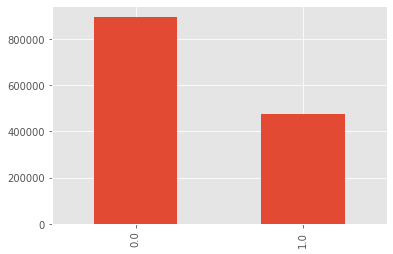

In [9]:
customers.FN.value_counts().plot(kind='bar')

In [10]:
customers.Active.fillna(0,inplace=True)

<AxesSubplot:>

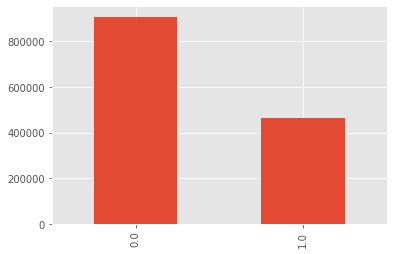

In [11]:
customers.Active.value_counts().plot(kind='bar')

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64


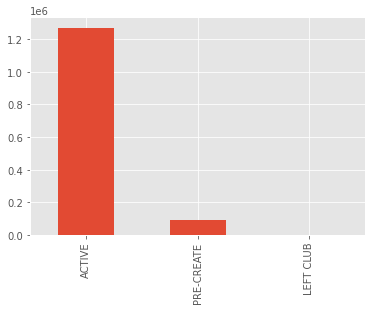

In [12]:
customers.club_member_status.value_counts().plot(kind='bar')
print(customers.club_member_status.value_counts())

### I think won't Data handling with this columns(Drop Age and postal_code)

In [13]:
customers.dropna(inplace=True)

### It looks maybe 40,000 data drop

In [14]:
customers.isna().sum()
print(customers.shape)

(1338570, 7)


## Feature Explain
   * Article (item Field)
      1. article_id 
      2. product_code : item category
      3. prod_name : product name
      4. product_type_no :  
      5. product_group_name : product category name
      6. graphical_appearance_no 
      7. graphical_appearance_name : product pattern style?
      8. colour_group_code
      9. color_group_name : product color
      10. preceived_colour_value_id
      11. perceived_colour_value_name : product detail color
      12. ETC....
      

In [15]:
article.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no
0,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002
1,108775044,108775,253,1010016,10,3,9,1676,A,1,16,1002
2,108775051,108775,253,1010017,11,1,9,1676,A,1,16,1002
3,110065001,110065,306,1010016,9,4,5,1339,B,1,61,1017
4,110065002,110065,306,1010016,10,3,9,1339,B,1,61,1017


In [16]:
article.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   article_id                  105542 non-null  int64 
 1   product_code                105542 non-null  int64 
 2   product_type_no             105542 non-null  int64 
 3   graphical_appearance_no     105542 non-null  int64 
 4   colour_group_code           105542 non-null  int64 
 5   perceived_colour_value_id   105542 non-null  int64 
 6   perceived_colour_master_id  105542 non-null  int64 
 7   department_no               105542 non-null  int64 
 8   index_code                  105542 non-null  object
 9   index_group_no              105542 non-null  int64 
 10  section_no                  105542 non-null  int64 
 11  garment_group_no            105542 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 9.7+ MB


In [17]:
article.isna().sum()

article_id                    0
product_code                  0
product_type_no               0
graphical_appearance_no       0
colour_group_code             0
perceived_colour_value_id     0
perceived_colour_master_id    0
department_no                 0
index_code                    0
index_group_no                0
section_no                    0
garment_group_no              0
dtype: int64

In [18]:
article.dropna(inplace=True)

### Feature Explain
   * transaction
      1. sales_channel_id : 1 is offline, 2 is online 

In [19]:
transaction.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


<AxesSubplot:>

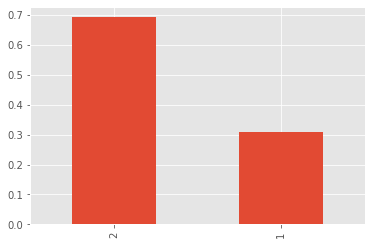

In [20]:
transaction.sales_channel_id.value_counts(normalize=True).plot(kind='bar')

In [21]:
user_field = customers.merge(transaction,on='customer_id',how='inner')

In [22]:
del transaction,customers
gc.collect()

3124

In [23]:
article.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no
0,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002
1,108775044,108775,253,1010016,10,3,9,1676,A,1,16,1002
2,108775051,108775,253,1010017,11,1,9,1676,A,1,16,1002
3,110065001,110065,306,1010016,9,4,5,1339,B,1,61,1017
4,110065002,110065,306,1010016,10,3,9,1339,B,1,61,1017


In [24]:
user_field.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,article_id,price,sales_channel_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,625548001,0.044051,1
1,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,176209023,0.035576,1
2,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2018-12-27,627759010,0.030492,1
3,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-02,697138006,0.010153,2
4,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,2019-05-25,568601006,0.050831,2


### merge User_field & item_field

In [25]:
df = article.merge(user_field,on='article_id',how='inner')
df.head()

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,price,sales_channel_id
0,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002,000f7535bdc611ad136a9f04746d6b1431f50a7f60fbbe...,0.0,0.0,ACTIVE,NONE,48.0,d0b267896af62f036d4871ad5edf0aa6c9cfd6d77207df...,2019-07-14,0.008458,1
1,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002,000f7535bdc611ad136a9f04746d6b1431f50a7f60fbbe...,0.0,0.0,ACTIVE,NONE,48.0,d0b267896af62f036d4871ad5edf0aa6c9cfd6d77207df...,2019-07-14,0.008458,1
2,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002,000f7535bdc611ad136a9f04746d6b1431f50a7f60fbbe...,0.0,0.0,ACTIVE,NONE,48.0,d0b267896af62f036d4871ad5edf0aa6c9cfd6d77207df...,2019-07-14,0.008458,1
3,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002,001ae5408a043f64bccd32beffe2730151414cbdf18a6e...,1.0,1.0,ACTIVE,Regularly,50.0,3247b5db1c4e6523a6d1e84eb25183a1cfc8a468eb9fed...,2018-09-29,0.006763,1
4,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002,001ae5408a043f64bccd32beffe2730151414cbdf18a6e...,1.0,1.0,ACTIVE,Regularly,50.0,3247b5db1c4e6523a6d1e84eb25183a1cfc8a468eb9fed...,2018-09-29,0.006763,1


In [26]:
df.drop_duplicates('customer_id',inplace=True)

In [27]:
del article
gc.collect()

46

In [28]:
df.sort_values('FN',inplace=True)
df

,article_id,product_code,product_type_no,graphical_appearance_no,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_no,index_code,index_group_no,section_no,garment_group_no,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,t_dat,price,sales_channel_id
0,108775015,108775,253,1010016,9,4,5,1676,A,1,16,1002,000f7535bdc611ad136a9f04746d6b1431f50a7f60fbbe...,0.0,0.0,ACTIVE,NONE,48.0,d0b267896af62f036d4871ad5edf0aa6c9cfd6d77207df...,2019-07-14,0.008458,1
2195013,548111012,548111,272,1010023,73,2,2,7917,H,4,76,1016,735b01eb94cd1d2e5204030905a89d5d5686e84bd23d73...,0.0,0.0,ACTIVE,NONE,45.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,2019-02-22,0.014390,1
2195016,548111012,548111,272,1010023,73,2,2,7917,H,4,76,1016,75d637c5b7f71e21c6f4dc93159084002d9e918a75dddf...,0.0,0.0,ACTIVE,NONE,34.0,d17000f2880832992ce6556871d70d46f5fe041a90df2b...,2019-02-22,0.014407,1
2195020,548111012,548111,272,1010023,73,2,2,7917,H,4,76,1016,7d5885aaec0887dec5fdaf94e30206dc70aa8345c519b6...,0.0,0.0,ACTIVE,NONE,35.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...,2018-12-04,0.015237,1
2195026,548111012,548111,272,1010023,73,2,2,7917,H,4,76,1016,8b575a11968307f42ab53a5264b3a8ee4f2b60534b349b...,0.0,0.0,ACTIVE,NONE,35.0,d4e48d428d29c44628f3ab2e3c08e25a9bfe9b84800b7e...,2019-01-18,0.016932,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3494211,579541038,579541,245,1010016,10,3,9,1616,A,1,11,1003,3941b9f39360029117d2e690341034b001045022987160...,1.0,1.0,ACTIVE,Regularly,51.0,7231844f5228da04e1a544cff73891e0b84f12cd5f18aa...,2019-03-31,0.016932,1
341677,305775024,305775,304,1010016,12,1,11,7921,H,4,79,1021,f05d11e2238e13c17adce40e3b992ccf018800f8ded4f8...,1.0,1.0,ACTIVE,Regularly,42.0,a0aa3022fd4dc8e7d7ef861a0ff1d8b542121d390ef039...,2018-10-17,0.005068,2
3494205,579541038,579541,245,1010016,10,3,9,1616,A,1,11,1003,36f7014a615c38d29a55ebfbdb7fc914d0c2d08904fec7...,1.0,1.0,PRE-CREATE,Regularly,41.0,45e80199b3019b4bc377d9d598147528145059df30a98f...,2019-04-07,0.016932,2
3494304,579541038,579541,245,1010016,10,3,9,1616,A,1,11,1003,4ae1d4e9bd8984708f39bbb62c96b225ce0bcdfdacb185...,1.0,1.0,ACTIVE,Regularly,27.0,3f864f3715f8d405d45c3f9942745bd6443f122561bd2f...,2019-04-26,0.016932,1


### user_field 
   * customer_id,FN	Active
   * club_member_status
   * fashion_news_frequency
   * age
   * postal_code
   * t_dat
   * price
   * sales_channel_id

### item_field
   * product_code
   * product_type_no
   * graphical_appearance_no
   * colour_group_code
   * perceived_colour_value_id
   * perceived_colour_master_id
   * department_no
   * index_code
   * index_group_no
   * section_no
   * garment_group_no

In [29]:
df.drop(['t_dat'],axis=1,inplace=True)

In [30]:
dense_features = df.iloc[::,1:11].columns.values.tolist()
sparse_features = df.iloc[::,12:].columns.values.tolist()
sparse_features.pop(1)
sparse_features.append('article_id')
target = ['FN']
print(dense_features)
print('-'*58)
print(sparse_features)

['product_code', 'product_type_no', 'graphical_appearance_no', 'colour_group_code', 'perceived_colour_value_id', 'perceived_colour_master_id', 'department_no', 'index_code', 'index_group_no', 'section_no']
----------------------------------------------------------
['customer_id', 'Active', 'club_member_status', 'fashion_news_frequency', 'age', 'postal_code', 'price', 'sales_channel_id', 'article_id']


In [31]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [32]:
df.index_code = encoder.fit_transform(df.index_code)
df.club_member_status = encoder.fit_transform(df.club_member_status)
df.fashion_news_frequency = encoder.fit_transform(df.fashion_news_frequency)
df.customer_id = encoder.fit_transform(df.customer_id)
df.postal_code = encoder.fit_transform(df.postal_code)
df.article_id = encoder.fit_transform(df.article_id)

<AxesSubplot:>

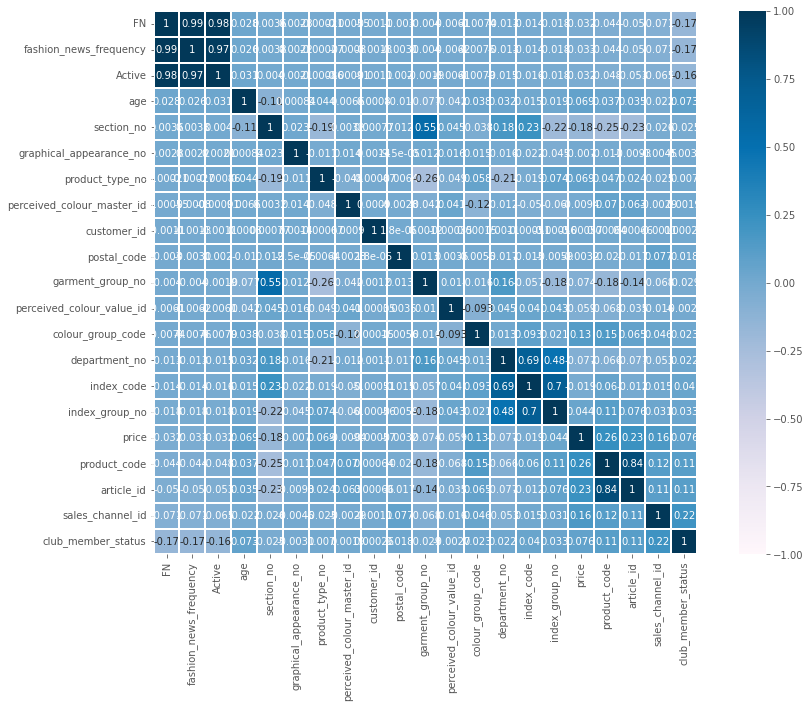

In [33]:
corr_data = df[df.keys()]
cmap = plt.cm.PuBu
cols = corr_data.corr().nlargest(len(df.keys()),'FN')['FN'].index
cm = np.corrcoef(corr_data[cols].values.T)
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm,vmax=1,vmin=-1,annot=True,square=True,linewidths=0.1,cmap=cmap,
            xticklabels=cols.values,yticklabels=cols.values)

In [34]:
del corr_data,cm,cols
gc.collect()

38

In [35]:
!pip install deepctr_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 567.8 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 27.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 12.2 MB/s eta 0:00:00
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=77041 sha256=d60f53b33bca41c6fbafd52422a15e8a2be2f57a9092ddc89437caf97bf4f2b6
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.14.1
    Uninstalling wrapt-1.14.1:
      Successfully uninstalled wrapt-1.14.1
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.2.0
    Uninstalling typing_extensions-4.2.0:
      Successfully uninstalled typing_extensions-4.2.0
  Attempting uninstall: six
    Found existing installatio

In [36]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset,DataLoader

from sklearn.metrics import log_loss, roc_auc_score
from sklearn.model_selection import train_test_split

from deepctr_torch.inputs import SparseFeat, DenseFeat, get_feature_names
from deepctr_torch.models import *

In [37]:
fixlen_feature_columns = [SparseFeat(feat, df[feat].nunique())
                              for feat in sparse_features] + [DenseFeat(feat, 1, )
                                                              for feat in dense_features]

In [38]:
dnn_feature_columns = fixlen_feature_columns
linear_feature_columns = fixlen_feature_columns

In [39]:
feature_names = get_feature_names(linear_feature_columns + dnn_feature_columns)

In [40]:
train, test = train_test_split(df,test_size=0.2,random_state=2020)
train_model_input = {name:train[name] for name in feature_names}
test_model_input = {name:test[name] for name in feature_names}

In [41]:
device = ('cuda' if torch.cuda.is_available() else 'cpu')

In [42]:
model = DeepFM(linear_feature_columns=linear_feature_columns,dnn_feature_columns=dnn_feature_columns,
              task='binary',device=device)

In [43]:
model = DeepFM(linear_feature_columns=linear_feature_columns, dnn_feature_columns=dnn_feature_columns,
                   task='binary',
                   l2_reg_embedding=1e-5, device=device)

model.compile("adagrad", "binary_crossentropy",
              metrics=["binary_crossentropy", "auc"], )

history = model.fit(train_model_input, train[target].values, batch_size=512, epochs=50, verbose=1,
                    validation_split=0.2)
pred_ans = model.predict(test_model_input, 256)
print("")
print("test LogLoss", round(log_loss(test[target].values, pred_ans), 4))
print("test AUC", round(roc_auc_score(test[target].values, pred_ans), 4))

cuda
Train on 603520 samples, validate on 150880 samples, 1179 steps per epoch


0it [00:00, ?it/s]/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [2,0,0], thread: [72,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [2,0,0], thread: [73,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [2,0,0], thread: [74,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
/usr/local/src/pytorch/aten/src/ATen/native/cuda/Indexing.cu:703: indexSelectLargeIndex: block: [2,0,0], thread: [75,0,0] Assertion `srcIndex < srcSelectDimSize` failed.
0it [00:00, ?it/s]


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.